In [1]:
import itertools

import numpy as np

In [2]:
train_samples = []
train_labels = []

for i in range(100):
    train_samples.append(np.random.randint(13,64))
    train_labels.append(0)

    train_samples.append(np.random.randint(65,100))
    train_labels.append(1)


for i in range(2000):
    train_samples.append(np.random.randint(13,64))
    train_labels.append(1)

    train_samples.append(np.random.randint(65,100))
    train_labels.append(0)

In [3]:
len(train_samples)

4200

In [4]:
def shuffle(x,y):
    temp_x=[]
    temp_y=[]
    if len(x) == len(y):
        for i in range(len(x)):
            k = np.random.randint(0,len(x))
            temp_x.append(x[k])
            temp_y.append(y[k])
            x = np.delete(x, k)
            y = np.delete(y, k)

        return np.array(temp_x),np.array(temp_y)
    else:
        raise Exception("Arrays length didnt equal")

In [5]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

train_samples,train_labels = shuffle(train_samples,train_labels)

In [6]:
train_samples[0:5]

array([89, 26, 43, 69, 26])

In [7]:
train_labels[0:5]

array([0, 1, 1, 0, 1])

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

train_samples_scaled = scaler.fit_transform(train_samples.reshape(-1,1))
train_samples_scaled[0:5]

array([[0.88372093],
       [0.15116279],
       [0.34883721],
       [0.65116279],
       [0.15116279]])

In [9]:
import keras
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization

In [10]:
import tensorflow as tf

devices  = tf.config.experimental.list_physical_devices()
print(devices)
print("Num Gpu Devices",len(devices))
tf.config.experimental.set_memory_growth(devices[1],True)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num Gpu Devices 2


In [11]:
model = Sequential()
model.add(Dense(units=16,input_shape=(1,),activation="relu"))
model.add(BatchNormalization())
model.add(Dense(units=32,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(units=16,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(units=2,activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_2 (Batc  (None, 16)               6

In [13]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.00001),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [14]:
model.fit(x=train_samples,y=train_labels,batch_size=500,epochs=100,validation_split=0.1,shuffle=True,verbose=2)

Epoch 1/100
8/8 - 3s - loss: 0.7387 - accuracy: 0.5405 - val_loss: 2.7561 - val_accuracy: 0.4595 - 3s/epoch - 333ms/step
Epoch 2/100
8/8 - 0s - loss: 0.7328 - accuracy: 0.5413 - val_loss: 2.0664 - val_accuracy: 0.4595 - 94ms/epoch - 12ms/step
Epoch 3/100
8/8 - 0s - loss: 0.7278 - accuracy: 0.5500 - val_loss: 1.7624 - val_accuracy: 0.4000 - 116ms/epoch - 15ms/step
Epoch 4/100
8/8 - 0s - loss: 0.7232 - accuracy: 0.5587 - val_loss: 1.5833 - val_accuracy: 0.3429 - 155ms/epoch - 19ms/step
Epoch 5/100
8/8 - 0s - loss: 0.7187 - accuracy: 0.5532 - val_loss: 1.4604 - val_accuracy: 0.2976 - 167ms/epoch - 21ms/step
Epoch 6/100
8/8 - 0s - loss: 0.7136 - accuracy: 0.5672 - val_loss: 1.3678 - val_accuracy: 0.2548 - 192ms/epoch - 24ms/step
Epoch 7/100
8/8 - 0s - loss: 0.7086 - accuracy: 0.5667 - val_loss: 1.2957 - val_accuracy: 0.2190 - 212ms/epoch - 26ms/step
Epoch 8/100
8/8 - 0s - loss: 0.7043 - accuracy: 0.5722 - val_loss: 1.2373 - val_accuracy: 0.1667 - 190ms/epoch - 24ms/step
Epoch 9/100
8/8 - 0

In [15]:
 ## Predict

In [16]:
test_samples = []
test_labels = []

for i in range(10):
    test_samples.append(np.random.randint(13, 64))
    test_labels.append(0)

    test_samples.append(np.random.randint(65, 100))
    test_labels.append(1)

for i in range(200):
    test_samples.append(np.random.randint(13, 64))
    test_labels.append(1)

    test_samples.append(np.random.randint(65, 100))
    test_labels.append(0)


def shuffle(x, y):
    temp_x = []
    temp_y = []
    if len(x) == len(y):
        for i in range(len(x)):
            k = np.random.randint(0, len(x))
            temp_x.append(x[k])
            temp_y.append(y[k])
            x = np.delete(x, k)
            y = np.delete(y, k)

        return np.array(temp_x), np.array(temp_y)
    else:
        raise Exception("Arrays length didnt equal")


test_samples = np.array(test_samples)
test_labels = np.array(test_labels)

test_samples, test_labels = shuffle(test_samples, test_labels)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

test_samples_scaled = scaler.fit_transform(test_samples.reshape(-1, 1))
test_samples_scaled[0:5]

array([[0.93023256],
       [0.12790698],
       [0.44186047],
       [0.43023256],
       [0.86046512]])

In [17]:
predictions = model.predict(test_samples_scaled,batch_size=10,verbose=0)
predictions

array([[0.01998722, 0.98001283],
       [0.01829088, 0.9817091 ],
       [0.01893715, 0.9810628 ],
       [0.01891283, 0.98108715],
       [0.01983381, 0.98016614],
       [0.0200129 , 0.9799871 ],
       [0.0198848 , 0.9801152 ],
       [0.01928104, 0.980719  ],
       [0.01903478, 0.9809652 ],
       [0.01848011, 0.98151994],
       [0.01848011, 0.98151994],
       [0.01935551, 0.9806444 ],
       [0.01973216, 0.9802679 ],
       [0.01958064, 0.98041934],
       [0.01901035, 0.98098963],
       [0.01908382, 0.9809162 ],
       [0.01815026, 0.98184973],
       [0.01869525, 0.98130476],
       [0.0191329 , 0.9808671 ],
       [0.01848011, 0.98151994],
       [0.01896153, 0.9810385 ],
       [0.01963102, 0.98036903],
       [0.01940532, 0.9805947 ],
       [0.01908382, 0.9809162 ],
       [0.01808035, 0.9819196 ],
       [0.01993595, 0.98006403],
       [0.01993595, 0.98006403],
       [0.01822046, 0.9817795 ],
       [0.01905928, 0.98094076],
       [0.01965627, 0.9803437 ],
       [0.

In [18]:
predict_labels = np.argmax(predictions,axis=1)
predict_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [19]:
true_labels = np.where(test_labels==predict_labels)
print(len(true_labels[0]))
print("True ",(len(true_labels[0])/len(test_samples)))

210
True  0.5


In [20]:
## Confusion matrix

In [21]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [22]:
cm = confusion_matrix(test_labels,predict_labels)

In [23]:
def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion matrix",cmap=plt.cm.Blues):

    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]

    print(cm)

    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j]>thresh else "black")

    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

[[  0 210]
 [  0 210]]


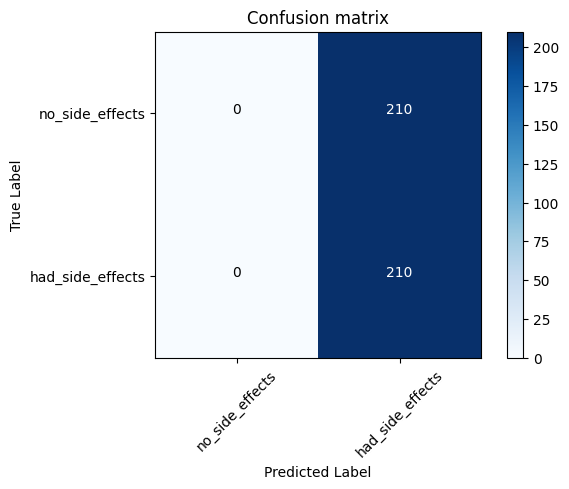

In [24]:
cm_plot_labels = ["no_side_effects","had_side_effects"]
plot_confusion_matrix(cm,cm_plot_labels)

In [25]:
## Save and Load Model

In [26]:
import os

if os.path.isfile("model/modelh5") is False:
    model.save("model/model.h5")


In [27]:
del model

In [28]:
model = keras.models.load_model("model/model.h5")

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_2 (Batc  (None, 16)               6

In [30]:
model.get_weights()

[array([[-0.5055242 ,  0.3393997 , -0.22281903,  0.03284917,  0.49408308,
         -0.12570265, -0.4894517 , -0.2666332 ,  0.14630051, -0.03870928,
          0.5989086 , -0.15784827, -0.5267318 , -0.5640683 , -0.13477793,
         -0.14032674]], dtype=float32),
 array([ 0.0000000e+00, -4.6270502e-06,  0.0000000e+00, -1.1601323e-05,
         9.6027543e-07,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         7.2524049e-06,  0.0000000e+00, -6.5038267e-07,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       dtype=float32),
 array([1.        , 0.99424535, 1.        , 0.993701  , 0.9964766 ,
        1.        , 1.        , 1.        , 1.0050586 , 1.        ,
        1.00871   , 1.        , 1.        , 1.        , 1.        ,
        1.        ], dtype=float32),
 array([-0.00726679,  0.00121751, -0.00366713, -0.00334344, -0.00045763,
         0.00296569,  0.00365287, -0.0034626 ,  0.00165142, -0.00456403,
         0.00313764,  0.00091684,  0.00